data from https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python

In [15]:
import os
import numpy as np
import pandas as pd

from functools import reduce
from operator import iconcat

import rfpimp
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import imageio
from IPython.display import Image
import tqdm
import seaborn as sns

In [172]:
def add_zero(num, len_num):
    if len(num) == len_num:
        return num
    else:
        num = '0' + num
        return add_zero(num, len_num)

    
def add_zero_not_rec(num, len_num):
    while len(num) != len_num:
        num = '0' + num
    return num

# Handmade LinearRegression 

In [30]:
# Calculate Coefficients

# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / len(values)

# Calculate covariance between x and y
def covariance(x, y):
    x_mean, y_mean = mean(x), mean(y)
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - x_mean) * (y[i] - y_mean)
    return covar

# Calculate the variance of a list of numbers
def variance(values):
    values_mean = mean(values)
    return sum([(x-values_mean)**2 for x in values])

# Calculate coefficients
def coefficients(x, y):
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, y) / variance(x)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]


def simple_linear_regression(x_train, y_train, x_test):
    predictions = list()
    b0, b1 = coefficients(x_train, y_train)
    for x in x_test:
        yhat = b0 + b1 * x
        predictions.append(yhat)
    return predictions


def functools_reduce_iconcat(a):
    return reduce(iconcat, a, [])

In [20]:
x = np.array([5,15,25,35,45,55]).reshape((-1,1))
y = np.array([5,20,14,32,22,38])

x = functools_reduce_iconcat(x)
y = y.tolist()

In [35]:
y_pred = simple_linear_regression(x,y,x)

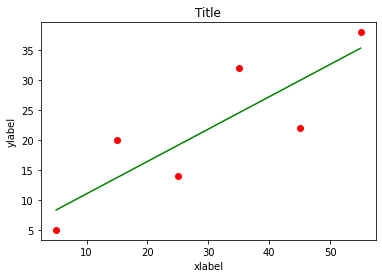

In [36]:
plt.scatter(x, y, color='red')
plt.plot(x, y_pred, color = 'green')
plt.title('Title')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.show()

# Simplest linear regression example

In [ ]:
x = np.array([5,15,25,35,45,55]).reshape((-1,1))
y = np.array([5,20,14,32,22,38])

In [187]:
model = LinearRegression().fit(x, y)

In [188]:
r_sq = model.score(x, y)

In [189]:
print(f'Coefficient of determination: {r_sq}')

Coefficient of determination: 0.7158756137479542


In [190]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: 5.633333333333329
slope: [0.54]


In [191]:
y_pred = model.predict(x)
print(f'predicted response:\n {y_pred}')

predicted response:
 [ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


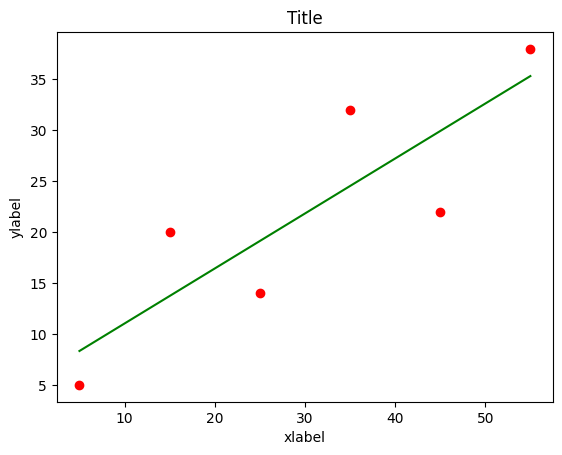

In [192]:
plt.scatter(x, y, color='red')
plt.plot(x, y_pred, color = 'green')
plt.title('Title')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.show()

# Using test dataset

In [126]:
file = 'unconv_MV_v5.csv'
path_back_dir = '/'.join(os.getcwd().split('/')[:-1])

df = pd.read_csv(os.path.join(path_back_dir, file))
features = ['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod']

# Permutation feature importance 

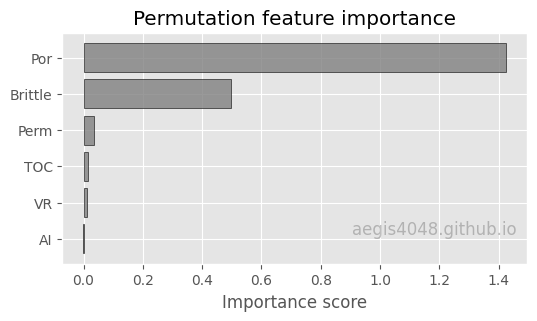

In [127]:
df_train, df_test = train_test_split(df, test_size=0.20)
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('Prod',axis=1), df_train['Prod']
X_test, y_test = df_test.drop('Prod',axis=1), df_test['Prod']


rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

imp = rfpimp.importances(rf, X_test, y_test)


fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
ax.text(0.8, 0.15, 'aegis4048.github.io', fontsize=12, ha='center', va='center',
        transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()

# fig.tight_layout()

In [8]:
df.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


# Linear model (n=1)

In [25]:
X = df['Por'].values.reshape(-1,1)
y = df['Prod'].values

ols = LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)
r2 = model.score(X, y)

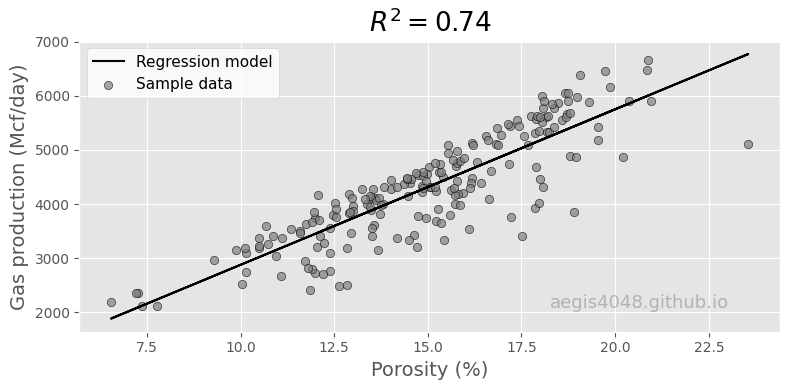

In [26]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Gas production (Mcf/day)', fontsize=14)
ax.set_xlabel('Porosity (%)', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
       transform=ax.transAxes, color='grey', alpha= 0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title(f'$R^2= {round(r2, 2)}$', fontsize=19)
fig.tight_layout()

# Multi-linear model (n=2)

In [176]:
X = df[['Por', 'Brittle']].values.reshape(-1,2)
Y = df['Prod'].values

x = X[:, 0]
y = X[:, 1]
z = Y

In [177]:
x_pred = np.linspace(6, 24, 30)
y_pred = np.linspace(0, 100, 30)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

ols = LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

r2 = model.score(X, Y)

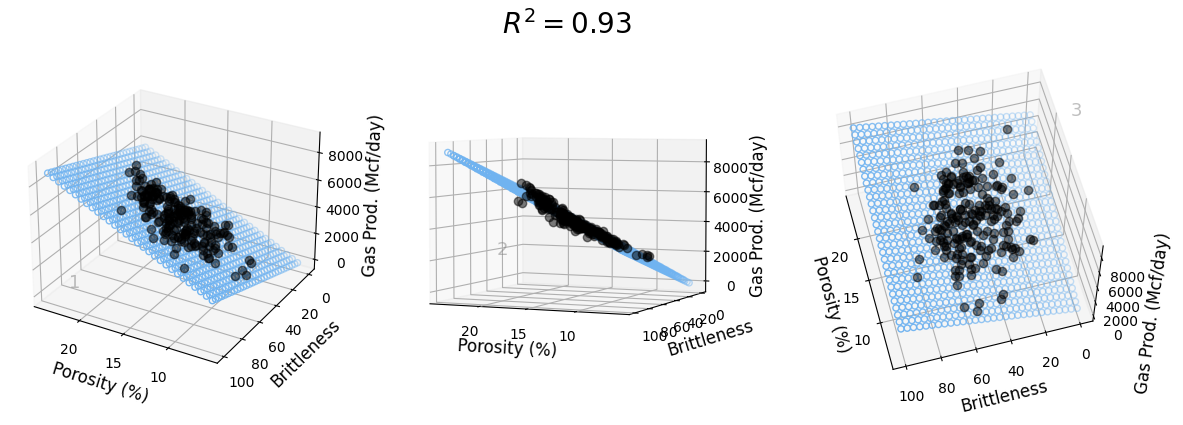

In [179]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('Brittleness', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, '1', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, '2', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, '3', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()


## Make GIF graph

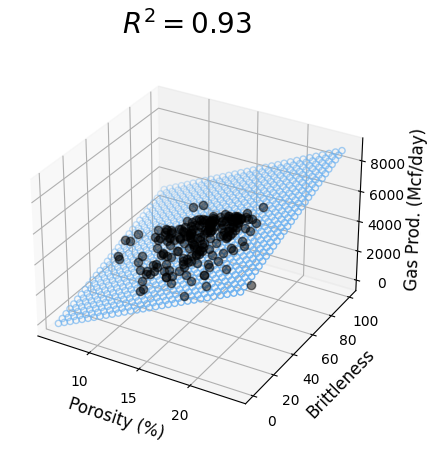

In [180]:
plt.style.use('default')

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.set_xlabel('Porosity (%)', fontsize=12)
ax.set_ylabel('Brittleness', fontsize=12)
ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
ax.locator_params(nbins=4, axis='x')
ax.locator_params(nbins=5, axis='x')

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

gif_folder = 'DATA_360_3D_plot'
if not os.path.exists(gif_folder):
    os.mkdir(gif_folder)
else:
    for f in os.listdir(gif_folder):
        os.remove(os.path.join(gif_folder, f))

In [ ]:
for angle in np.arange(0, 360, 1):
    ax.view_init(elev=32, azim=angle)
    fig.savefig(os.path.join(gif_folder, f'gif_image{add_zero_not_rec(str(angle), 3)}.png'))

name_gif = 'graph.gif'    

imageio.mimsave(name_gif
                , [imageio.imread(os.path.join(gif_folder, name)) for name in sorted(os.listdir(gif_folder))])
Image(open(name_gif, 'rb').read())

# Multi-linear model (n=4)

In [27]:
features = ['Por', 'Brittle', 'Perm', 'TOC']
target = 'Prod'

X = df[features].values.reshape(-1,len(features))
y = df[target].values

ols = LinearRegression()
model = ols.fit(X, y)

In [28]:
print(f'slope: {model.coef_}')
print(f'intercept: {model.intercept_}')

slope: [244.60011793  31.58801063  86.87367291 325.19354135]
intercept: -1575.2734966267144


In [29]:
print(f'B0 = {model.intercept_}')
print('\n'.join([f'B{x[0]+1} = {x[1]}' for x in enumerate(model.coef_)]))

B0 = -1575.2734966267144
B1 = 244.60011793439168
B2 = 31.588010634831818
B3 = 86.87367290889794
B4 = 325.19354135000236


In [17]:
df.iloc[:, 1:-1]

,Por,Perm,AI,Brittle,TOC,VR
0,12.08,2.92,2.80,81.40,1.16,2.31
1,12.38,3.53,3.22,46.17,0.89,1.88
2,14.02,2.59,4.01,72.80,0.89,2.72
3,17.67,6.75,2.63,39.81,1.08,1.88
4,17.52,4.57,3.18,10.94,1.51,1.90
...,...,...,...,...,...,...
195,11.95,3.13,2.97,67.18,0.80,2.06
196,17.99,9.87,3.38,44.32,0.98,2.08
197,12.12,2.27,3.52,57.07,-0.04,1.73
198,15.55,4.48,2.48,58.25,1.89,2.35


In [24]:
features = ['Por', 'Brittle', 'Perm', 'TOC', 'AI', 'VR']
target = 'Prod'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = ['Por', 'Brittle', 'Perm', 'TOC', 'VR']
target = 'Prod'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = ['Por', 'Brittle', 'Perm', 'TOC', 'AI']
target = 'Prod'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = ['Por', 'Brittle', 'Perm', 'TOC']
target = 'Prod'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = ['Por', 'Brittle', 'Perm', 'AI']
target = 'Prod'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = ['Por', 'Brittle', 'Perm', 'VR']
target = 'Prod'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = ['Por', 'Brittle', 'TOC', 'VR']
target = 'Prod'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = ['Por', 'Brittle', 'TOC']
target = 'Prod'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = ['Por', 'Brittle', 'VR']
target = 'Prod'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = ['Por', 'Brittle', 'AI']
target = 'Prod'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = ['Por', 'Brittle']
target = 'Prod'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)

Features                :  ['Por', 'Brittle', 'Perm', 'TOC', 'AI', 'VR']
Regression Coefficients :  [230.3, 25.0, 116.23, -77.44, -363.74, 783.19]
R-squared               :  0.96
Y-intercept             :  -1230.26

Features                :  ['Por', 'Brittle', 'Perm', 'TOC', 'VR']
Regression Coefficients :  [246.9, 30.0, 88.19, 267.1, 191.11]
R-squared               :  0.95
Y-intercept             :  -1856.64

Features                :  ['Por', 'Brittle', 'Perm', 'TOC', 'AI']
Regression Coefficients :  [246.29, 31.59, 85.17, 336.92, 25.92]
R-squared               :  0.95
Y-intercept             :  -1682.04

Features                :  ['Por', 'Brittle', 'Perm', 'TOC']
Regression Coefficients :  [244.6, 31.59, 86.87, 325.19]
R-squared               :  0.95
Y-intercept             :  -1575.27

Features                :  ['Por', 'Brittle', 'Perm', 'AI']
Regression Coefficients :  [282.42, 31.01, 76.18, -43.65]
R-squared               :  0.94
Y-intercept             :  -1616.46

Features  

In [60]:
df

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832
...,...,...,...,...,...,...,...,...
195,196,11.95,3.13,2.97,67.18,0.80,2.06,3847.571003
196,197,17.99,9.87,3.38,44.32,0.98,2.08,5601.227131
197,198,12.12,2.27,3.52,57.07,-0.04,1.73,3409.575363
198,199,15.55,4.48,2.48,58.25,1.89,2.35,5087.592149


Determinants 0.09695917283666805


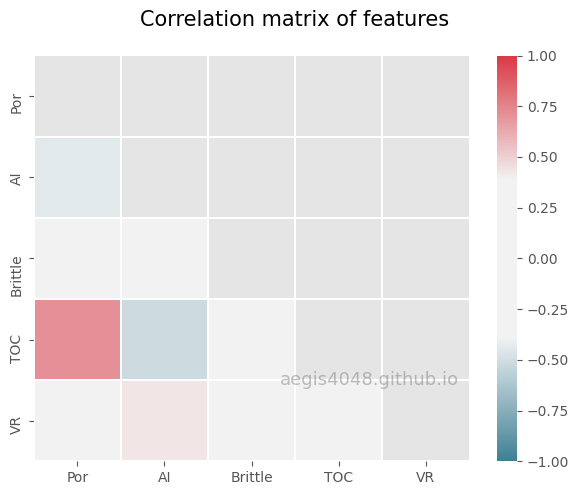

In [78]:
corr = df.iloc[:, 1:-1].drop('Perm', axis=1).corr(method='spearman')
# corr = df.drop(['Well', 'Por',], axis=1).corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)
ax.text(0.77, 0.2, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()
print(f'Determinants {np.linalg.det(corr.to_numpy())}')

In [ ]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * ящ / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

Если между факторами определилась абсолютно линейная зависимость и все коэффициенты корреляции равняются единице, то определитель (детерминант) такой матрицы равен нулю. Чем ближе к нулю определитель матрицы межфакторной корреляции, тем сильнее мультиколлинеарность факторов и ненадежнее результаты множественной регрессии. Чем ближе к единице детерминант (определитель) матрицы межфакторной корреляции, тем меньше мультиколлинеарность факторов.

# Multicollinearity

When more than two features are used for prediction, you must consider the possibility of each features interacting with one another. For thought experiment, think of two features x1 and x2, and a response variable y. Assume that x1 is positively related to y. In the other words, increasing x1 increases y, and decreasing x1 also decreases y. x2 is negatively related to y. There is a positive correlation between x1 and x2. Under this sitution, when you increase x1, you expect to increase the value of y because of the positive relationship between x1 and y, but this is not always true because increasing x1 also increases x2, which in turn decreases y.

The situation in which features are correlated with one another is called multicollinearity. Under multicollinearity, the values of individual regression coefficients are unreliable, and the impact of individual features on a response variable is obfuscated. However, prediction on a response variable is still reliable.

When using linear regression coefficients to make business decisions, you must remove the effect of multicollinearity to obtain reliable regression coefficients. Let's say that you are doing a medical research on cervical cancer. You trained a linear regression model with patients' survival rate with respect to many features, in which water consumption being one of them. Your linear regression coefficient for water consumption reports that if a patient increases water consumption by 1.5 L everyday, his survival rate will increase by 2%. Can you trust this analysis? The answer is yes, if there is no sign of multicollinearity. You can actually tell the patient, with confidence, that he must drink more water to increase his chance of survival. However, if there is a sign of multicollinearity, this analysis is not valid.

Note that multicollinearity is not restricted on 1 vs 1 relationship. Even if there is minimum 1 vs 1 correlation among features, three or more features together may show multicollinearity. Also note that multicollinearity does not affect prediction accuracy. While the values of individual coefficients may be unreliable, it does not undermine the prediction power of the model. Multicollinearity is an issue only when you want to study the impact of individual features on a response variable.

The details of detection & remedies of mutlicollinearity is not discussed here (though I plan to write about it very soon). While the focus of this post is only on multiple linear regression itself, I still wanted to grab your attention as to why you should not always trust your regression coefficients.

# Мультиколлинеарность

Если для прогнозирования используется более двух "фич" (features), необходимо учитывать возможность взаимодействия каждой "фичи" (features) друг с другом. Для мысленного эксперимента подумайте о двух "фичах" (features) x1 и x2 и переменной отклика y. Предположим, что x1 положительно связан с y. Другими словами, увеличение x1 увеличивает y, а уменьшение x1 также уменьшает y. x2 отрицательно связан с y. Между x1 и x2 существует положительная корреляция. В этой ситуации, когда вы увеличиваете x1, вы ожидаете увеличения значения y из-за положительной связи между x1 и y, но это не всегда верно, потому что увеличение x1 также увеличивает x2, что, в свою очередь, уменьшает y.

Ситуация, в которой признаки коррелируют друг с другом, называется мультиколлинеарность. В условиях мультиколлинеарности значения отдельных коэффициентов регрессии ненадежны, а влияние отдельных характеристик на переменную отклика скрыто. Тем не менее, прогноз по переменной ответа по-прежнему надежен.

При использовании коэффициентов линейной регрессии для принятия бизнес-решений необходимо устранить эффект мультиколлинеарности, чтобы получить надежные коэффициенты регрессии. Допустим, вы проводите медицинское исследование рака шейки матки. Вы обучили модель линейной регрессии с выживаемостью пациентов по многим характеристикам, в которых потребление воды является одним из них. Ваш коэффициент линейной регрессии для потребления воды сообщает, что если пациент увеличивает потребление воды на 1,5 л каждый день, его выживаемость увеличится на 2%. Можете ли вы доверять этому анализу? Ответ положительный, если нет признаков мультиколлинеарности. Вы можете с уверенностью сказать пациенту, что он должен пить больше воды, чтобы увеличить свои шансы на выживание. Однако, если есть признак мультиколлинеарности, этот анализ недействителен.

Обратите внимание, что мультиколлинеарность не ограничивается отношением 1 к 1. Даже если между "фичами" (features) существует минимальная корреляция 1 против 1, три или более "фич" (features) вместе могут показывать мультиколлинеарность. Также обратите внимание, что мультиколлинеарность не влияет на точность прогноза. Хотя значения отдельных коэффициентов могут быть ненадежными, это не снижает возможности прогнозирования модели. Мультиколлинеарность возникает только тогда, когда вы хотите изучить влияние отдельных "фич" (features) на переменную отклика.

# Ковариа́ция 
(корреляционный момент, ковариационный момент) — в теории вероятностей и математической статистике мера линейной зависимости двух случайных величин.